In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/sample_data/dau.csv',parse_dates=['Date'])

In [3]:
df.info() # date format 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    110 non-null    datetime64[ns]
 1   DAU     110 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [4]:
df.columns

Index(['Date', 'DAU '], dtype='object')

In [5]:
df.head() 

,Date,DAU
0,2021-09-01,13421
1,2021-09-02,15858
2,2021-09-03,15832
3,2021-09-04,17144
4,2021-09-05,18753


In [6]:
df=df.groupby('Date').sum()

In [7]:
df.head(10)

,DAU
Date,
2021-09-01,13421
2021-09-02,15858
2021-09-03,15832
2021-09-04,17144
2021-09-05,18753
2021-09-06,16273
2021-09-07,18850
2021-09-08,14999
2021-09-09,16691


In [8]:
df=df.resample(rule='W').sum()

In [9]:
df.head(10)

,DAU
Date,
2021-09-05,81008
2021-09-12,123062
2021-09-19,139236
2021-09-26,127168
2021-10-03,109155
2021-10-10,97147
2021-10-17,100808
2021-10-24,141835
2021-10-31,161701


In [ ]:
df.shape

(16, 1)

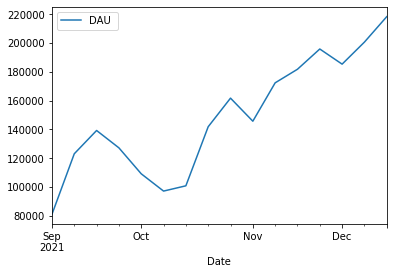

In [10]:
df.plot()

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-12-09fb01788b7e>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model='additive',freq=7).plot();


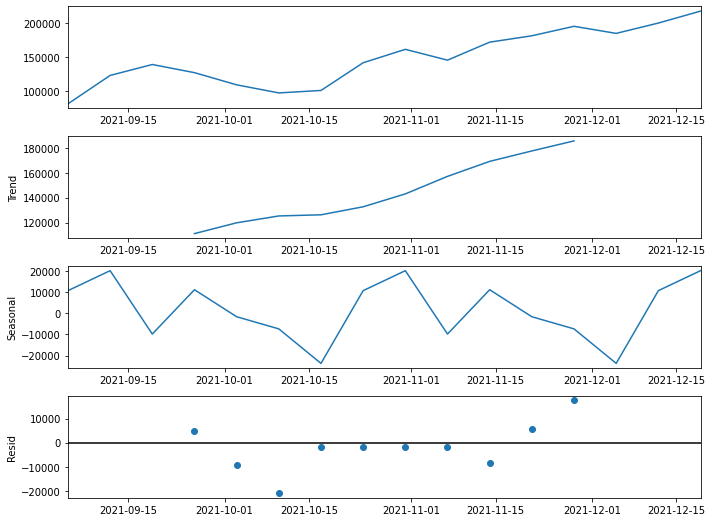

In [12]:
plt.rcParams.update({'figure.figsize': (10,8)})
seasonal_decompose(df,model='additive',freq=7).plot();
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [13]:
train=df[:15] #till 12 Dec
test=df[15:] # 12 to 19 dec


In [14]:
train.tail()

,DAU
Date,
2021-11-14,172330
2021-11-21,181766
2021-11-28,195829
2021-12-05,185314
2021-12-12,200623


In [15]:
test


,DAU
Date,
2021-12-19,218306


In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
hwmodel=ExponentialSmoothing(train['DAU '],trend='add', seasonal='mul', seasonal_periods=7).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [18]:
test_pred=hwmodel.forecast(1)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [19]:
test_pred

2021-12-19    252356.134878
Freq: W-SUN, dtype: float64

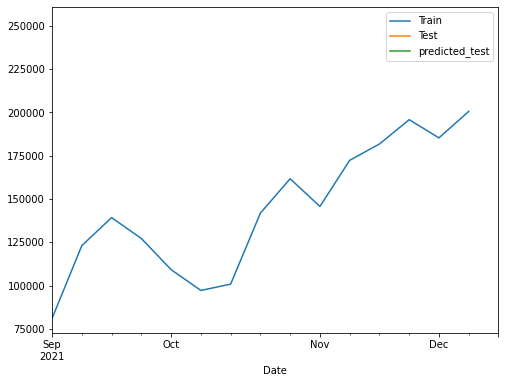

In [20]:
train['DAU '].plot(legend=True, label='Train', figsize=(8,6))
test['DAU '].plot(legend=True, label='Test')

test_pred.plot(legend=True, label='predicted_test')

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
np.sqrt(mean_squared_error(test,test_pred))

34050.13487794346

In [23]:
df['DAU '].mean(), np.sqrt(df['DAU '].var())

(148810.625, 41058.81596583938)

In [25]:
final_model=ExponentialSmoothing(df['DAU '],trend='add', seasonal='mul', seasonal_periods=7).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [26]:
pred=final_model.forecast(2)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [27]:
pred


2021-12-26    231194.694337
2022-01-02    255884.756481
Freq: W-SUN, dtype: float64

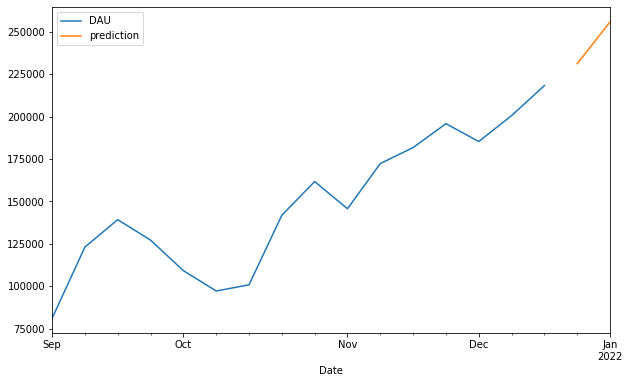

In [28]:
df['DAU '].plot(legend=True, label='DAU ', figsize=(10,6))
pred.plot(legend=True, label='prediction')

In [29]:
pred.to_frame()

,0
2021-12-26,231194.694337
2022-01-02,255884.756481
